<a href="https://colab.research.google.com/github/florgaleana/SSF-Oto24FlorMarianGaleanaJuarez/blob/main/SSF_T6_FMGJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flor Marián Galeana Juárez

*Simulación de Sistemas Físicos*

**Tarea 6**

Reproducir la solución del Sistema de Lorenz utilizando el código en: https://colab.research.google.com/github/leflores-fisi/lorenz-attractor/blob/main/LorenzSystem.ipynb#scrollTo=aTfCNzDEd4bD

El código representa un conjunto de soluciones caóticas del sistema de Lorenz . El término "efecto mariposa" en los medios populares puede derivar de las implicaciones del atractor de Lorenz en el mundo real, es decir, que pequeños cambios en las condiciones iniciales evolucionan hacia trayectorias completamente diferentes.

El atractor de Lorenz es un concepto introducido por Edward Lorenz en 1963. Se trata de un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre.

Ecuaciones de lorenz:

\begin{align}
\frac{dx}{dt} &= σ(y-x) \\
\frac{dy}{dt} &= x(ρ-z)-y \\
\frac{dz}{dt} &= xy - β z
\end{align}

con σ, ρ y Β como constantes físicas atmosféricas


Código 1. «*Implemente la función representativa del sistema en lenguaje Python. Tenga en cuenta que la variable de estado sería un ndArray de 3 dimensiones. Por otra parte, la función recibe los parámetros de entrada
σ , ρ y β*».



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [ ]:
#Primero definimos la función solve_lorenz en un estado cualquiera (x, y, z)
#con parámetros físicos definidos.

def solve_lorenz(state, t, sigma, rho, beta):
  x, y, z = state

  dx= sigma*(y-x)
  dy= x*(rho-z) -y
  dz= (x*y) - (beta * z)
  return dx, dy, dz

 #Lo que estamos haciendo es definir las soluciones a partir de las derivadas
 #mencionadas al inicio.

 #Ahora, demos un ejemplo para resolver la función con parámetros iniciales:
solve_lorenz((1, 1, 1), t=1, sigma=10, rho=28, beta=8/3)

(0, 26, -1.6666666666666665)

Código 2. «*Escriba el código correspondiente a la simulación de este sistema para un intervalo de tiempo $t ∈ [0, 100]$ que contenga 3000 valores equidistantes. Además utilice los parámetros $σ = 10$, $ρ = 28$, $β = 8/3$ y el vector de condiciones iniciales $(1, 1, 1)$. Emplee para ello la función
`odeint`*».

Se define un estado de coordenadas iniciales `initial_state` y con ayuda de la función `numpy.linspace` crearemos intervalos de tiempo espaciados uniformemente.

In [ ]:
#Determinamos el estado inicial del sistema en forma de una lista,
#cada valor corresponde a una de las tres variables del sistema Lorenz.
initial_state = [1, 1, 1]
sigma, rho, beta = 10, 28, 8/3

#Definimos el conjunto de tiempos en los cuales se evaluará el sistema.
t= np.linspace(0, 100, 3000)
print('Valores equidistantes de t:', t.size)

Valores equidistantes de t: 3000


Implementamos la función `odeint`, *ordinary differential equations integration*, la cual nos ayudará a resolver el sistema (con la función `solve_lorenz`) para una secuencia de puntos `t` en el tiempo definidos anteriormente.

Esto nos permitirá ver cómo evolucionan x(t), y(t) y z(t) con respecto al tiempo.

In [ ]:
states= odeint(solve_lorenz, initial_state, t, args=(sigma, rho, beta))
#Extrae la primera, segunda y tercera columna respectivamente de states,
#que contiene los valores de la variable x(t), y(t) y z(t)
#para cada instante de tiempo en el vector t.
xs= states[:,0]
ys= states[:,1]
zs= states[:,2]

A partir de pyplot.figure con proyección 3D, representamos gráficamente los resultados obtenidos:

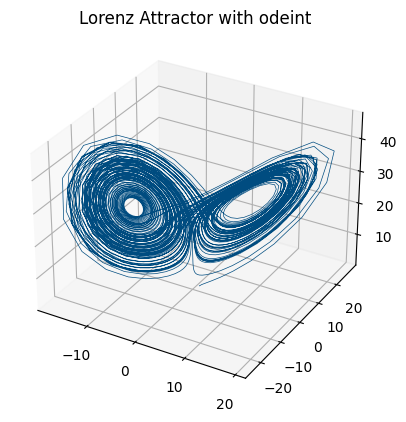

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs,ys,zs,lw=0.5,c='#004c80')
ax.set_title('Lorenz Attractor with odeint')
plt.show()

Código 3. «*Cree una gráfica en 3 dimensiones que utilice la paleta de colores llamada `plt.cm.plasma` para representar la solución la cual deberá de tener una forma similar a la Figura 1*».

<figure align="center">
<img src="https://raw.githubusercontent.com/leflores-fisi/lorenz-attractor/ef0f459574d3142709b7053c9d3f8e1a28dc9d30/imgs/pec3_figure1.png" align="center" width="300"/>
<figcaption align="center"><i>Figura 1</i></figcaption>
</figure>

In [ ]:
#Colormap de matplotlib aplica colores a los datos
cmap= plt.cm.plasma
# Plasma aplica al colormap una gama de colores ideal para datos y valores
#continuos.
print('Tipo del objeto colormap:', type(cmap))
print('Elemento indexado:', cmap(0)) #Devuelve un color
#correspondiente al valor 0 en la escala de colormap

Tipo del objeto colormap: <class 'matplotlib.colors.ListedColormap'>
Elemento indexado: (0.050383, 0.029803, 0.527975, 1.0)


Retomando el proceso del código 2, podemos envolverlo dentro de una función que reciba el **estado inicial** y **las constantes**. En lugar de *plotear* directamente los resultados del `odeint`, los iteraremos para aplicar en intervalos `s` los valores correspondientes de nuestro `colormap`.

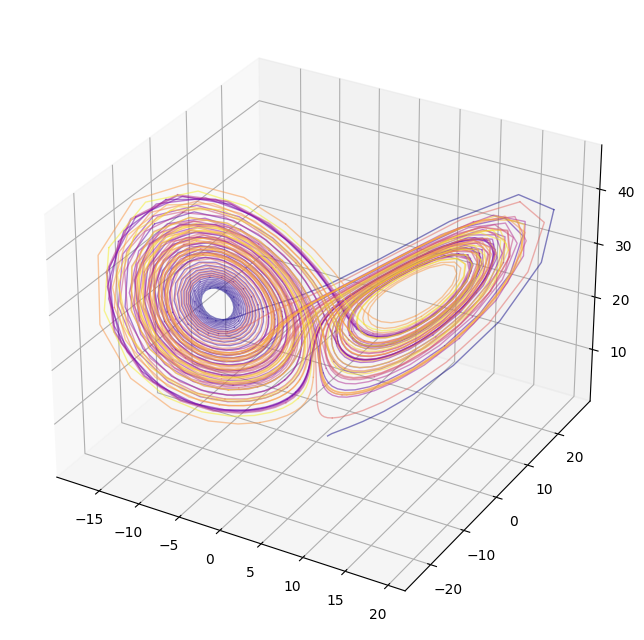

In [ ]:
#Definimos la función y las condiciones iniciales
#ax= None es un eje opcional para el gráfico en 3D.
#Si no se pasa ningún eje, la función crea uno nuevo.
def lorenz_attractor(state0, parameters, ax=None, text_offset=0.01):
  sigma, rho, beta = parameters
  n=3000
  t=np.linspace(0,100,n) #Generamos le secuencia de puntos de tiempo

  #Resolvemos las ecuaciones para la secuencia de puntos t
  states=odeint(solve_lorenz, state0, t, args=(sigma, rho, beta))
  #Trayectorias que sigue el atractor de Lorenz
  xs=states[:,0]
  ys=states[:,1]
  zs=states[:,2]

#Creamos el gráfico en 3D y trazamos las trayectorias:
  if ax is None:
    ax=plt.figure(figsize=(8,9)).add_subplot(projection='3d')
    #Intervalos de 10 unidades de ancho
    s=10
    #Iteramos en estos intervalos aplicando el colormap correspondiente:
    for i in range(0, n-s, s):
      ax.plot(xs[i:i+s+1], ys[i:i+s+1], zs[i:i+s+1], color=cmap(i/n), alpha=0.5, lw=1)

 #Condiciones iniciales propuestas
lorenz_attractor((1,1,1), (10,28,8/3))
plt.show()


El código genera un gráfico 3D del atractor de Lorenz, la trayectoria es coloreada utilizando un mapa de colores (colormap) y los segmentos del gráfico están trazados en intervalos de tamaño 10.

Notemos que el resultado es un gráfico del atractor de Lorenz es un sistema caótico y produce una figura muy conocida en forma de "alas de mariposa". La trayectoria representa el comportamiento caótico del sistema con el tiempo.

Código 4. «*Solucione el mismo problema con los mismos parámetros a excepción de $ρ$ el cual tomará los valores $−42$, $15$, $28$ y $100$. Almacene las respuestas en dos listas, una para el parámetro $ρ$ y la otra para la solución correspondiente.*».

Almacenamos los 4 valores para la constante $ρ$ en `rho_values` y ejecutamos nuestro `lorenz_attractor` para cada valor de $ρ$, con todo lo demás constante, obteniendo así los resultado esperados.

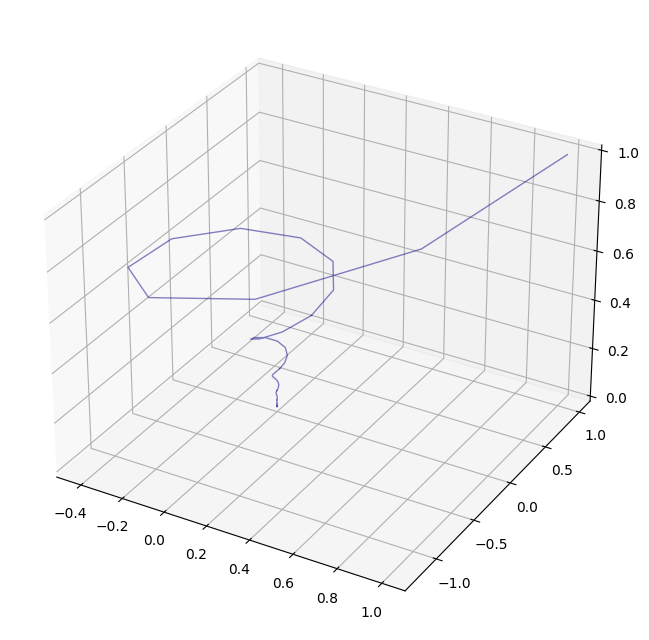

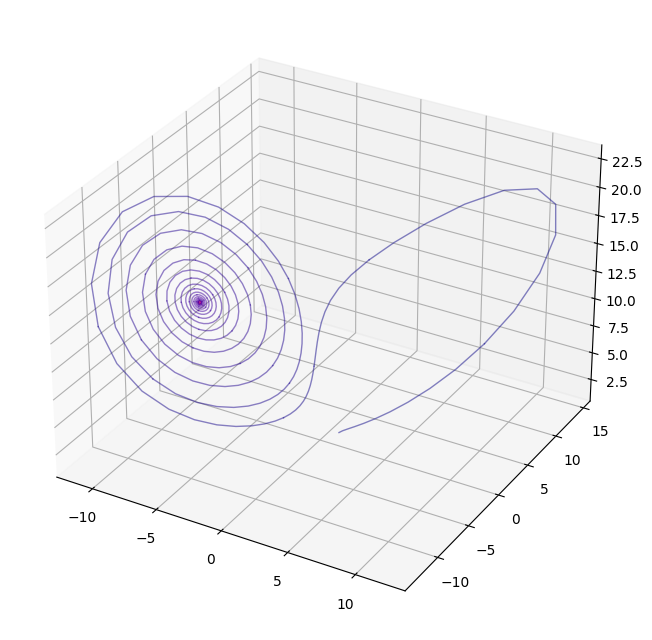

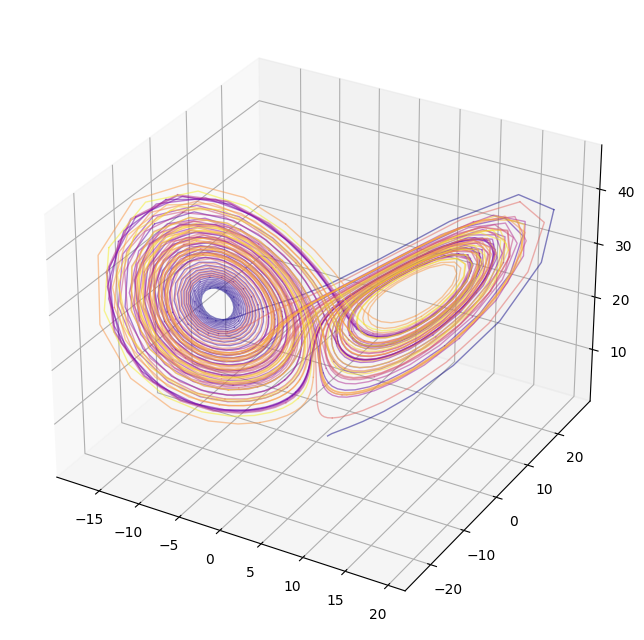

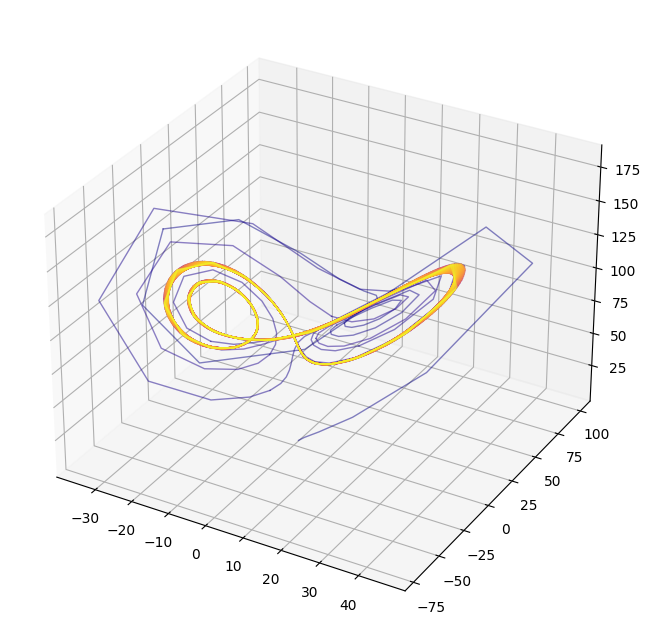

In [ ]:
rho_values=[-42, 15, 28, 100] #Definimos una lista de valores para rho
#Estos valores controlan la fuerza del efecto del parámetro en las ecuaciones
#del sistema Lorenz, lo que produce atractores diferentes.
solutions=[lorenz_attractor((1,1,1), (10, rho, 8/3)) for rho in rho_values]

for solution in solutions:
  plt.show()

Notemos que cada atractor es diferente, ya que $ρ$ afecta el comportamiento dinámico del sistema

Código 5. «*Cree gráficas de 3 dimensiones para representar cada solución, todas
en la misma figura. Para ello cree una figura de 2 fila y 2 columnas.
Coloque en el texto del título de la gráfica el parámetro $ρ$ igualado a
el valor correspondiente en cada caso. Garantice que la figura tenga
un tamaño de $10 × 10$*».

In [ ]:
#Definimos el parámetro para la figura, `size=(10, 10)` con 2 filas
#y dos columnas, esto es, 4 `subplots` dentro de ella.

rows, cols = 2, 2
size = (10, 10)

Instanciaremos la figura e iteraremos los `axes` bidimensionalmente para cada `axe` de la figura con un valor específico de $ρ$. Esto con ayuda de `numpy.ndindex`, obteniendo el resultado deseado.

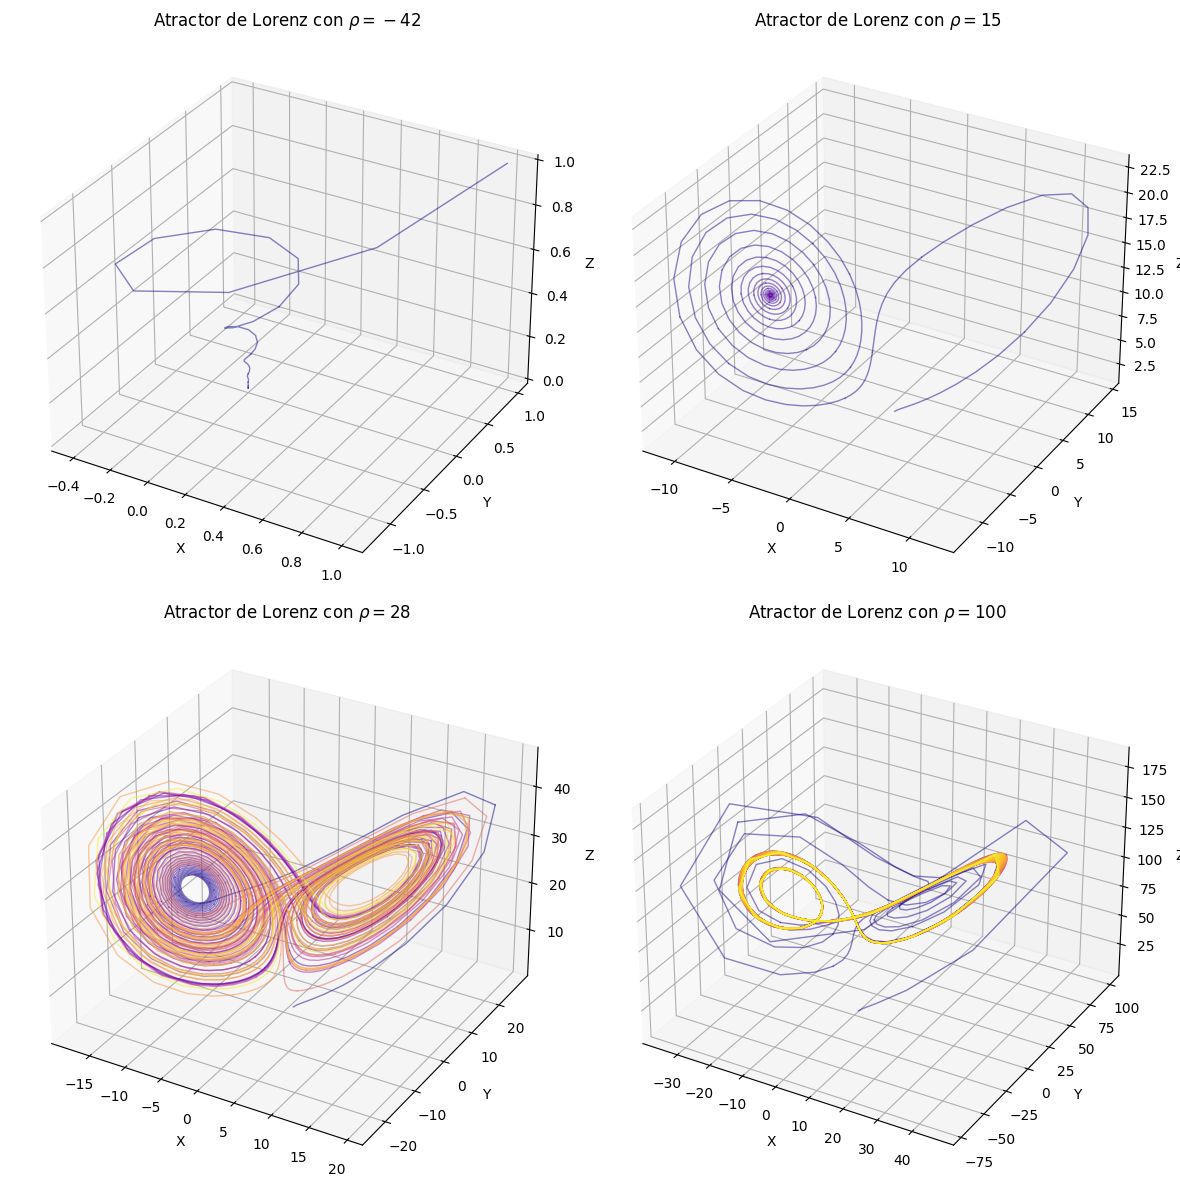

In [ ]:

# Definimos el sistema Lorenz
def solve_lorenz(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Función para graficar el atractor de Lorenz
def lorenz_attractor(state0, parameters, ax=None, text_offset=0.01):
    sigma, rho, beta = parameters
    n = 3000
    t = np.linspace(0, 100, n)

    # Resolvemos las ecuaciones diferenciales
    states = odeint(solve_lorenz, state0, t, args=(sigma, rho, beta))
    xs = states[:, 0]
    ys = states[:, 1]
    zs = states[:, 2]

    # Si no se pasa un eje, creamos uno nuevo
    if ax is None:
        ax = plt.figure(figsize=(8, 9)).add_subplot(projection='3d')

    # Graficamos los resultados
    s = 10  # tamaño del intervalo
    for i in range(0, n - s, s):
        ax.plot(xs[i:i + s + 1], ys[i:i + s + 1], zs[i:i + s + 1], color=plt.cm.plasma(i/n), alpha=0.5, lw=1)

    # Etiquetas y título opcionales
    ax.set_title(f'Atractor de Lorenz con $\\rho={rho}$')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

# Lista de valores de rho
rho_values = [-42, 15, 28, 100]
rows, cols = 2, 2  # Definimos la cuadrícula de subplots
size = (12, 12)    # Tamaño de la figura

# Instanciamos la figura y los ejes 3D
fig, axs = plt.subplots(rows, cols, figsize=size, subplot_kw=dict(projection='3d'))

# Convertimos la lista de valores de rho en una matriz
rho_values2s = np.array(rho_values).reshape(rows, cols)

# Iteramos sobre cada subplot (0,0), (0,1), (1,0), (1,1)
for row, col in np.ndindex((rows, cols)):
    rho = rho_values2s[row, col]
    # Graficamos el atractor en el subplot correspondiente
    lorenz_attractor(state0=(1, 1, 1), parameters=(10, rho, 8/3), ax=axs[row, col])

# Mostramos la figura
plt.tight_layout()  # Ajusta el layout para evitar solapamiento de gráficos
plt.show()


Finalmente, definiremos la función `butterfly` para iterar una figura de $n×n$ dimensiones.

Jugaremos con las constantes físicas y el ángulo de visualización de los `subplots`, iterando entre los `colormaps` disponibles añadiendo un fondo negro y removiendo los ejes, dando como resultado un deleite visual por cortesía de Edward Norton Lorenz.

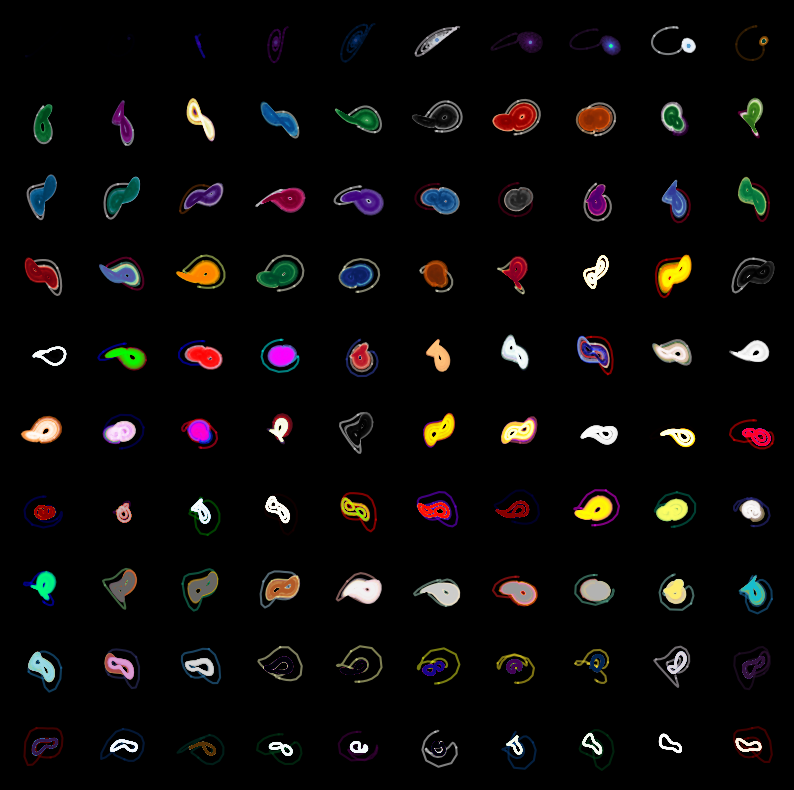

In [ ]:
fsize= (10,10)
ndim= 10

def butterfly(ax, colormap, rho, angle):
  tmax=100
  n=10000
  sigma, rho, beta= (10, rho, 8/3)
  u0,v0,w0= (0,1,1.05)
  t=np.linspace(0,tmax,n)

  soln= odeint(solve_lorenz, (u0,v0,w0), t, args=(sigma, rho, beta))

  x, y, z= soln[:,0], soln[:,1], soln[:,2]
  ax.set_facecolor('k')

  s=10
  cmap= getattr(plt.cm, colormap)
  for i in range(0, n-s, s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color= cmap(i/n), alpha= 0.5)

    ax. set_axis_off()
    ax.view_init(angle, angle)

axs= plt.figure(facecolor='k', figsize=fsize).subplots(ndim,ndim, subplot_kw=dict(projection='3d'))
for i, (row,col) in enumerate(np.ndindex((ndim, ndim))):
  butterfly(axs[row, col], plt.colormaps()[i], rho=2.5*i, angle=21*i)




Bibliografía



*   El atractor de Lorenz | IMAGINARY. (s.f.). https://www.imaginary.org/es/gallery/el-atractor-de-lorenz
*   Choosing Colormaps in Matplotlib — Matplotlib 3.9.2 documentation. (s.f.). https://matplotlib.org/stable/users/explain/colors/colormaps.html
*Google Colab. (s.f.). https://colab.research.google.com/github/leflores-fisi/lorenz-attractor/blob/main/LorenzSystem.ipynb#scrollTo=q4nZdzYJjmN0
*odeint — SciPy v1.14.1 Manual. (s.f.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
*https://www.asociacionceat.org/aw/2/atractor_lorenz.htm




